In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target.shape

(70000,)

In [4]:
X, y = mnist.data , mnist.target
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]

In [ ]:
a = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    a.append(neigh.score(X_test, y_test))

In [ ]:
b = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i , metric='cosine')
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    b.append(neigh.score(X_test, y_test))

In [ ]:
print(a, b)

[0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694, 0.967, 0.9659, 0.9665] [0.9723, 0.968, 0.9733, 0.9736, 0.973, 0.9726, 0.9727, 0.9731, 0.9717, 0.9708]


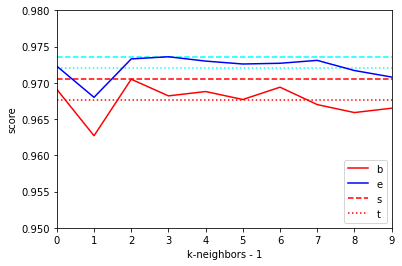

In [ ]:

plt.plot(a, color= 'red')
plt.plot(b , color = 'blue')
plt.ylim(0.95,0.98)
plt.xlim(0,9)
plt.hlines(np.max(a) , 0 , 9 , linestyle = '--', color = 'red')
plt.hlines(np.mean(a) , 0 , 9 , linestyle = ':', color = 'red')
plt.hlines(np.max(b) , 0 , 9 , linestyle = '--', color = 'aqua')
plt.hlines(np.mean(b) , 0 , 9 , linestyle = ':', color = 'aqua')
plt.xlabel('k-neighbors - 1')
plt.ylabel('score')
plt.legend('best', loc='lower right')
plt.show()

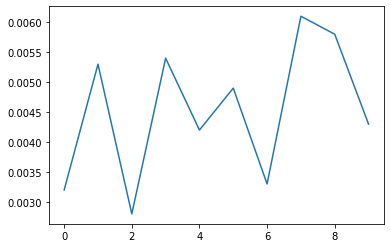

In [ ]:
c = []
for i in range(len(a)):
   c.append(b[i] - a[i])

plt.plot(c)

In [ ]:
np.argmax(b)

4

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=np.argmax(b), metric= 'cosine')
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9733

введем взвешивание по дистанции

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=np.argmax(b), metric= 'cosine' , weights = 'distance')
X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9742

In [ ]:
b_dist = []
for i in range(2,6):
    neigh = KNeighborsClassifier(n_neighbors=i , metric='cosine', weights = 'distance')
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    b_dist.append(neigh.score(X_test, y_test))

In [ ]:
b_dist

[0.9723, 0.9742, 0.9752, 0.9738]

In [ ]:
np.max(b_dist)

0.9752

In [ ]:
a_dist = []
for i in range(2,6):
    neigh = KNeighborsClassifier(n_neighbors=i , weights = 'distance')
    X_train, X_test , y_train, y_test = mnist.data[:60000] , mnist.data[60000:] ,mnist.target[:60000] , mnist.target[60000:]
    neigh.fit(X_train, y_train)
    neigh.score(X_test, y_test)
    a_dist.append(neigh.score(X_test, y_test))

In [ ]:
a_dist

[0.9691, 0.9717, 0.9714, 0.9691]

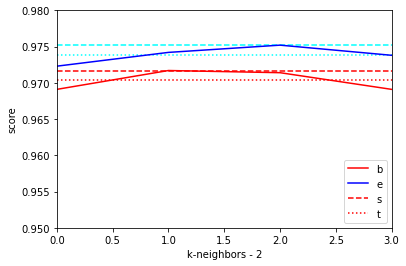

In [ ]:
plt.plot(a_dist, color= 'red')
plt.plot(b_dist , color = 'blue')
plt.ylim(0.95,0.98)
plt.xlim(0,3)
plt.hlines(np.max(a_dist) , 0 , 3, linestyle = '--', color = 'red')
plt.hlines(np.mean(a_dist) , 0 , 3 , linestyle = ':', color = 'red')
plt.hlines(np.max(b_dist) , 0 ,3 , linestyle = '--', color = 'aqua')
plt.hlines(np.mean(b_dist) , 0 , 3 , linestyle = ':', color = 'aqua')
plt.xlabel('k-neighbors - 2')
plt.ylabel('score')
plt.legend('best', loc='lower right')
plt.show()

In [ ]:
np.max(a), np.max(b),np.max(a_dist),np.max(b_dist)

(0.9705, 0.9736, 0.9717, 0.9752)

In [ ]:
np.argmax(a)+1, np.argmax(b)+1,np.argmax(a_dist)+2,np.argmax(b_dist)+2

(3, 4, 3, 4)

Лучшая метрика имеет параметры 3\4 соседа, выберем 3 как хоооший тон КНН, косинусное расстояние, нормированное по дистанции

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3 , metric='cosine', weights = 'distance')
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


0.9742

In [64]:
(np.where(neigh.predict(X_test) != y_test))

import random
smpl = random.sample(np.where(neigh.predict(X_test) != y_test) , 5)

ValueError: ignored

посомтрим примеры ошибок

4
9


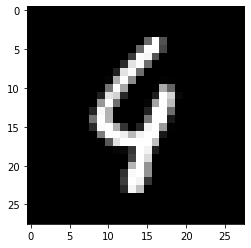

9
8


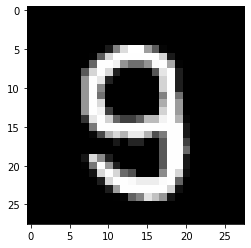

4
6


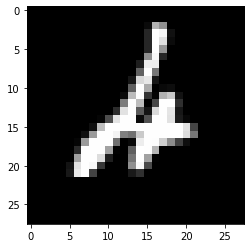

8
1


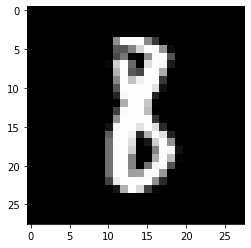

8
3


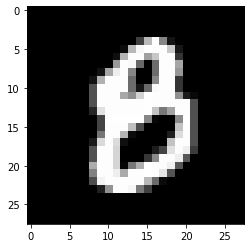

9
1


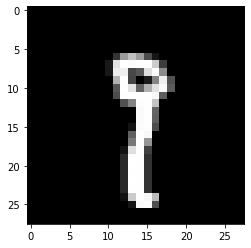

2
7


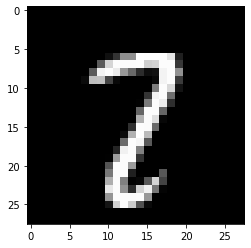

7
4


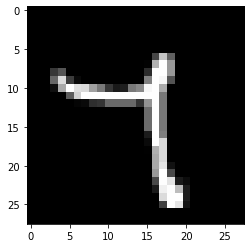

6
0


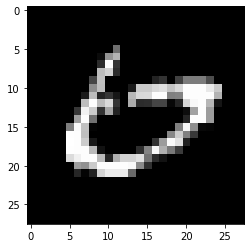

9
8


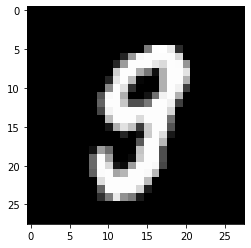

3
7


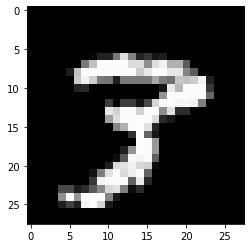

In [57]:
for item in smpl:
  plt.imshow(np.reshape(X_test[item], (28,28)), cmap ='gray')
  plt.axis("off")
  print(y_test[item])
  print(neigh.predict(X_test)[item])
  plt.show()

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, neigh.predict(X_test))

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    3,    1,    0,    0,    1,    0,    0,    0],
       [   8,    1, 1009,    1,    1,    0,    0,    8,    4,    0],
       [   0,    1,    3,  975,    0,   13,    0,    5,    7,    6],
       [   2,    2,    0,    0,  946,    0,    6,    1,    1,   24],
       [   4,    0,    0,    9,    1,  859,    7,    1,    6,    5],
       [   4,    2,    0,    0,    2,    3,  947,    0,    0,    0],
       [   1,   10,    6,    0,    1,    0,    0,  996,    0,   14],
       [   6,    2,    2,   10,    4,    4,    4,    3,  936,    3],
       [   8,    7,    2,    5,    7,    3,    1,    6,    3,  967]])